### Mini Project _ Fifa

This project contains a dataset of football players from a game called Fifa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the csv file
data = pd.read_csv("./data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv")

In [3]:
#display all columns
pd.options.display.max_columns = None
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
#Copy of the entire dataframe before any change just to be on the safeside
dataSaved = data.copy()

In [5]:
#Drop obvious columns that serve no purpose for this analisys
data = data.drop(["Player Photo","Club Logo","Flag Photo","Loan Date End","Gender","W/F","Contract","Joined","Team & Contract","A/W","D/W","ID"], axis=1)

In [6]:
#standardize header names
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [7]:
#pd.options.display.max_rows = None  #to display all, columns with nah: 
#Here it was checked come columns that contained nah values and comentend the ones with the highest values
""" Some of max number of nah values
Club                   23
Position              413
Joined                 58
Loan Date End       16215
Volleys                58
Curve                  58
Agility                58
Jumping                58
Composure             423
"""
data.isna().sum()


name            0
age             0
ova             0
nationality     0
club           23
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 95, dtype: int64

In [8]:
#Dealing with unwanted values in rows

data['weight'] = data['weight'].apply(lambda x: round(float(str(x).replace('lbs', ''))*0.45359237,2))

#data['value']
data['value'] = data['value'].map(lambda x: str(x).replace('K', '000') if 'K' in str(x) else str(x) + '00000' if '.' in str(x) else str(x) + '000000')
data['value'] = data['value'].apply(lambda x: str(x).replace('€','').replace('M','').replace('.','')).astype(int)

#data['release_clause']
data['release_clause'] = data['release_clause'].map(lambda x: str(x).replace('K', '000') if 'K' in str(x) else str(x) + '00000' if '.' in str(x) else str(x) + '000000')
data['release_clause'] = data['release_clause'].apply(lambda x: str(x).replace('€','').replace('M','').replace('.','')).astype(int)

data['wage'] = data['wage'].map(lambda x: str(x).replace('K', '000').replace('€','')).astype(int)

In [9]:
#solve and clean height in cm
def heightfix(x):
    ft = str(x).replace('"', '').replace('[', '').split('\'')[0]
    inch = str(x).replace('"', '').replace('[', '').split('\'')[1]
    if not ft:
        ft = 0
    else:
        ft = int(ft)
    if not inch:
        inch = 0
    else:
        inch = int(inch)
    return ft*30+inch*2.54
  
data['height'] = data['height'].apply(heightfix)

In [10]:
#remove the star
data['ir'] = data['ir'].apply(lambda x: str(x).replace('★',''))
data['sm'] = data['sm'].apply(lambda x: str(x).replace('★',''))

In [11]:
#have a single value in the potentials
def plusfix(x):
    total_pot = str(x).split('+')[0]
    added_pot = str(x).split('+')[1]
    return total_pot

data['ls'] = data['ls'].apply(plusfix)
data['st'] = data['st'].apply(plusfix)
data['rs'] = data['rs'].apply(plusfix)
data['lw'] = data['lw'].apply(plusfix)
data['lf'] = data['lf'].apply(plusfix)
data['cf'] = data['cf'].apply(plusfix)
data['rf'] = data['rf'].apply(plusfix)
data['rw'] = data['rw'].apply(plusfix)
data['lam'] = data['lam'].apply(plusfix)
data['cam'] = data['cam'].apply(plusfix)
data['ram'] = data['ram'].apply(plusfix)
data['lm'] = data['lm'].apply(plusfix)
data['lcm'] = data['lcm'].apply(plusfix)
data['cm'] = data['cm'].apply(plusfix)
data['rcm'] = data['rcm'].apply(plusfix)
data['rm'] = data['rm'].apply(plusfix)
data['lwb'] = data['lwb'].apply(plusfix)
data['ldm'] = data['ldm'].apply(plusfix)
data['cdm'] = data['cdm'].apply(plusfix)
data['rdm'] = data['rdm'].apply(plusfix)
data['rwb'] = data['rwb'].apply(plusfix)
data['lb'] = data['lb'].apply(plusfix)
data['lcb'] = data['lcb'].apply(plusfix)
data['cb'] = data['cb'].apply(plusfix)
data['rcb'] = data['rcb'].apply(plusfix)
data['rb'] = data['rb'].apply(plusfix)
data['gk'] = data['gk'].apply(plusfix)


In [12]:
#drop nah values, where less than 600 rows got removed
data = data.dropna()

In [13]:
#given that there are only aproximately 300 players worth 0$ I decided to drop them since no value happens in games like these
#and can reflect a worse outcome in what comes to predict the value of a player based on their stats

data = data[data['value'] != 0]

In [14]:
data

,name,age,ova,nationality,club,bov,bp,position,pot,height,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,175.40,64.86,Right,0,600000,7000,1100000,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,3,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,167.78,68.04,Right,0,5500000,12000,7200000,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17
6,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,77,167.78,72.12,Left,0,2800000,44000,5300000,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4,2,44,71,83,77,62,66,7,66,66,66,72,72,72,72,72,75,75,75,72,76,76,76,72,66,72,72,72,66,64,65,65,65,64,16
12,R. Keane,35,80,Republic of Ireland,LA Galaxy,81,CF,ST,80,172.86,73.03,Right,0,5500000,10000,0,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,63,11,9,13,14,16,1974,407,3,2,68,82,75,82,31,69,10,79,79,79,79,81,81,81,79,81,81,81,78,74,74,74,78,57,57,57,57,57,52,47,47,47,52,20
26,G. Buffon,42,82,Italy,Juventus,82,GK,GK,82,190.16,92.08,Right,0,2200000,41000,3600000,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,1,4,77,76,74,78,33,91,154,31,31,31,30,33,33,33,30,34,34,34,32,35,35,35,32,28,33,33,33,28,26,29,29,29,26,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,195.24,74.84,Right,5,550000,2000,0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2,1,54,30,37,48,64,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,12
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,175.40,77.11,Right,10,130000,3000,273000,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,2,1,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,172.86,69.85,Right,11,130000,2000,273000,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,2,1,63,35,44,52,54,55,3,46,46,46,50,47,47,47,50,47,47,47,50,46,46,46,50,54,50,50,50,54,54,54,54,54,54,14
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,73,172.86,6

In [15]:
# DIVISION

In [16]:
#describing the daframe with the values rounded by 2 decimal points
data.describe().apply(lambda x: round(x,2))

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
count,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,1.610100e+04,16101.00,1.610100e+04,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.0,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00,16101.00
mean,24.93,66.85,67.82,72.60,178.59,75.05,5.76,2.690967e+06,10637.30,4.844598e+06,258.09,51.48,47.90,53.45,60.44,44.81,266.12,57.90,49.41,44.05,54.16,60.60,323.76,65.73,65.74,64.76,62.75,64.78,302.43,59.61,65.16,63.52,65.19,48.95,261.17,56.77,46.85,52.29,55.33,49.94,59.81,141.54,47.23,48.24,46.07,77.04,15.50,15.35,15.22,15.37,15.6,1630.14,360.99,68.35,54.76,58.74,64.17,50.14,64.83
std,4.71,6.87,6.65,5.71,6.69,7.14,5.82,5.506976e+06,21379.64,1.060094e+07,71.75,17.79,19.35,16.81,13.86,17.59,76.31,17.97,18.05,17.30,14.80,15.76,54.40,14.55,14.31,14.33,9.03,14.02,49.20,13.23,11.92,15.21,12.60,18.97,62.49,16.98,20.82,19.00,13.64,15.47,11.73,61.34,20.06,21.42,21.12,80.43,16.68,15.97,15.67,16.21,17.0,259.69,40.40,10.94,13.87,10.17,9.82,16.82,9.68
min,16.00,45.00,44.00,47.00,152.54,49.90,0.00,3.000000e+03,500.00,0.000000e+00,42.00,6.00,3.00,5.00,7.00,4.00,43.00,5.00,4.00,5.00,9.00,5.00,122.00,12.00,13.00,14.00,24.00,17.00,128.00,15.00,22.00,11.00,16.00,4.00,50.00,9.00,4.00,2.00,10.00,7.00,12.00,20.00,3.00,5.00,6.00,5.00,1.00,1.00,1.00,1.00,1.0,731.00,228.00,26.00,16.00,25.00,28.00,13.00,27.00
25%,21.00,62.00,64.00,69.00,172.86,69.85,0.00,4.250000e+05,2000.00,6.060000e+05,231.00,40.00,33.00,46.00,56.00,32.00,232.00,53.00,37.00,32.00,45.00,57.00,296.00,59.00,59.00,57.00,57.00,57.00,272.00,50.00,58.00,56.00,58.00,35.00,234.00,45.00,26.00,43.00,46.00,40.00,53.00,85.00,30.00,28.00,25.00,48.00,8.00,8.00,8.00,8.00,8.0,1492.00,333.00,62.00,45.00,52.00,59.00,35.00,59.00
50%,24.00,67.00,68.00,72.00,177.94,74.84,5.00,8.500000e+05,4000.00,1.400000e+06,270.00,56.00,52.00,56.00,63.00,46.00,278.00,63.00,51.00,42.00,57.00,64.00,332.00,68.00,68.00,67.00,63.00,67.00,308.00,61.00,66.00,66.00,66.00,53.00,268.00,59.00,53.00,57.00,57.00,51.00,61.00,158.00,52.00,55.00,52.00,53.00,11.00,11.00,11.00,11.00,11.0,1657.00,362.00,69.00,57.00,59.00,65.00,53.00,66.00
75%,28.00,71.00,72.00,76.00,182.54,79.83,10.00,2.600000e+06,11000.00,4.300000e+06,305.00,65.00,63.00,65.00,69.00,58.00,318.00,70.00,63.00,58.00,65.00,70.00,361.00,76.00,75.00,75.00,69.00,75.00,339.00,70.00,73.00,74.00,74.00,64.00,302.00,70.00,65.00,66.00,65.00,61.00,68.00,194.00,64.00,66.00,64.00,59.00,14.00,14.00,14.00,14.00,14.0,1810.00,389.00,76.00,65.00,66.00,71.00,64.00,72.00
max,47.00,93.00,93.00,95.00,202.86,110.22,26.00,1.055000e+08,560000.00,2.031000e+08,437.00,94.00,95.00,93.00,94.00,90.00,470.00,96.00,94.00,94.00,93.00,96.00,464.00,97.00,96.00,96.00,95.00,97.00,444.00,95.00,95.00,97.00,97.00,94.00,421.00,96.00,93.00,95.00,95.00,92.00,96.00,272.00,94.00,93.00,95.00,440.00,90.00,92.00,93.00,91.00,90.0,2316.00,498.00,96.00,93.00,93.00,95.00,91.00,91.00


In [17]:
#selecting numeric columns
data.select_dtypes(np.number)

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
1,37,71,70,71,175.40,64.86,0,600000,7000,1100000,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
4,36,81,82,81,167.78,68.04,0,5500000,12000,7200000,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
6,38,77,77,77,167.78,72.12,0,2800000,44000,5300000,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,44,71,83,77,62,66
12,35,80,81,80,172.86,73.03,0,5500000,10000,0,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,63,11,9,13,14,16,1974,407,68,82,75,82,31,69
26,42,82,82,82,190.16,92.08,0,2200000,41000,3600000,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,77,76,74,78,33,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,69,195.24,74.84,5,550000,2000,0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
17121,18,56,58,66,175.40,77.11,10,130000,3000,273000,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
17122,18,56,56,67,172.86,69.85,11,130000,2000,273000,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,63,35,44,52,54,55
17123,20,62,62,73,172.86,67.13,11,475000,3000,784000,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57,62,61.0,51,15,13,8,6,9,1579,335,71,34,58,59,59,54


Text(0, 0.5, 'ova')

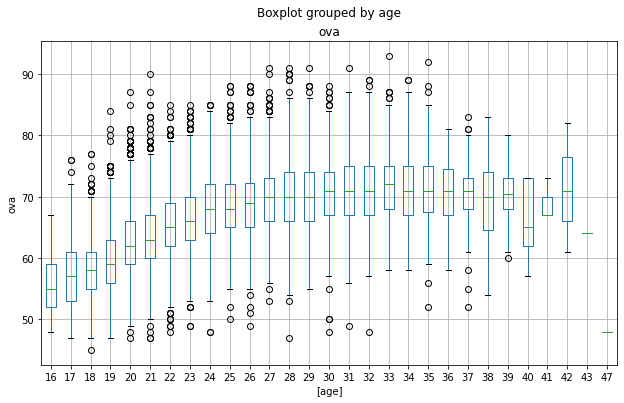

In [18]:
#What is the average overall evolution with age?
#Overall VS age with the evolution of the average level in green
#We can see the average overall climbs and peeks at 33 years, maintains some years and then goes down at 40 years old

ax = data[['ova', 'age']].boxplot(by='age', figsize=(10,6))
ax.set_ylabel('ova')

'g.figure.set_size_inches(6.5, 4.5)\ng.ax.margins(.15)\ng.despine(trim=True)'

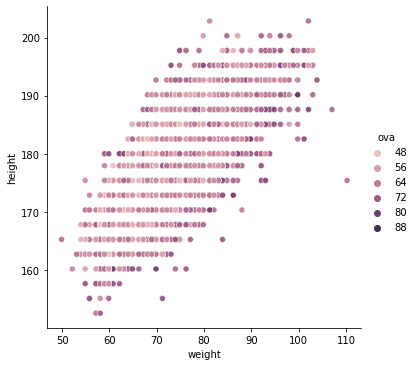

In [44]:
#whats the effect of height and weight in the player's overall?
#height vs weight highlighted with the overall score of the player
#we can observe the best overall usually are on the extremeties and not on the center/middle of the rest
g= sns.relplot(
    data=data,
    x="weight", y="height", hue="ova"
    )
"""g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)
not sure how to change size"""

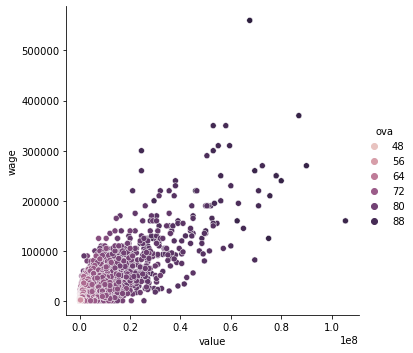

In [20]:
#How does wage and value compare with the players overall
#Wage vs Value with overall coloured, we can see that either a bigger wage or value translates in a better overall player
#We can observe that there are not many outliers compared with the actual ammount of players so a good aproach at predicting the
#big blob of players would be to remove the outliers since they have values that can mess up the predictions of the middle to low end players
g= sns.relplot(
    data=data,
    x="value", y="wage", hue="ova"
    )

Text(0.5, 0, 'Best Position')

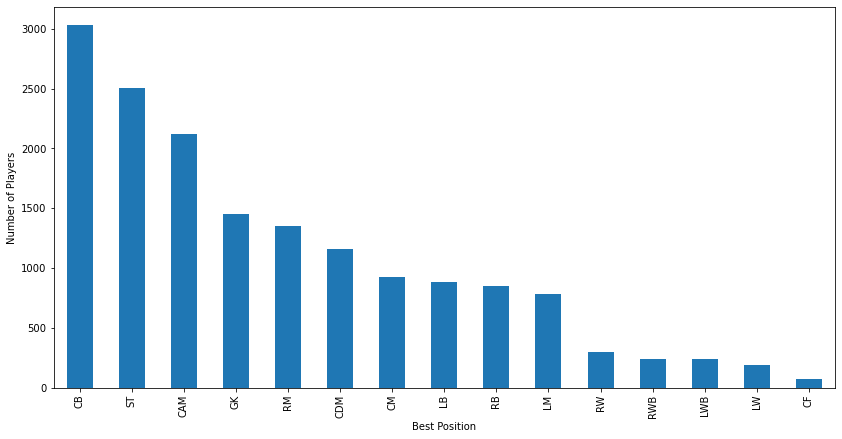

In [21]:
#Number of players by their best position
ax = data['bp'].value_counts().plot(kind='bar', figsize=(14,7))
ax.set_ylabel('Number of Players')
ax.set_xlabel('Best Position')

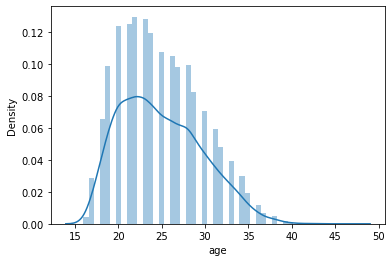

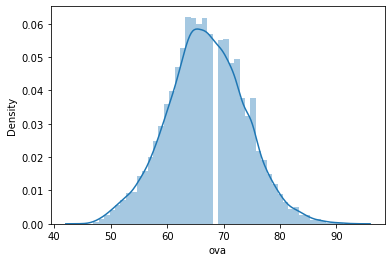

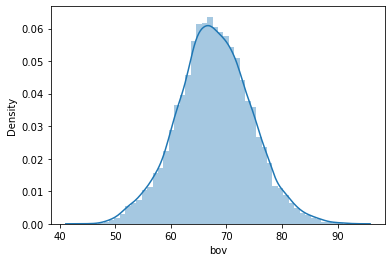

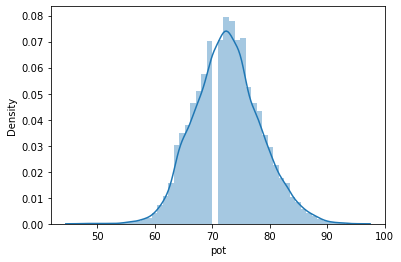

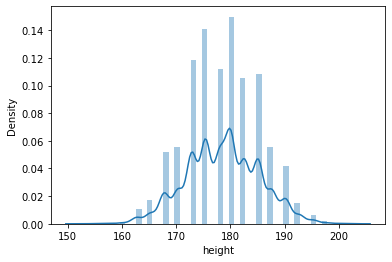

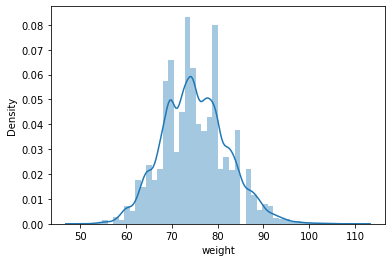

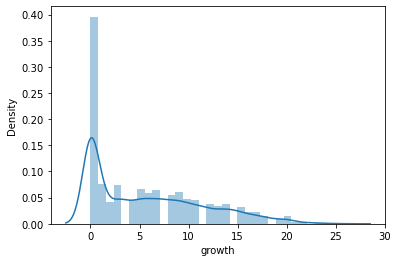

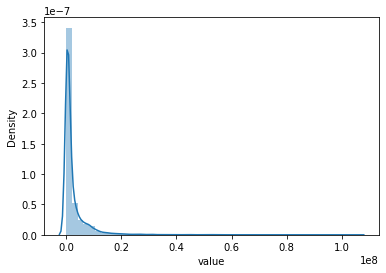

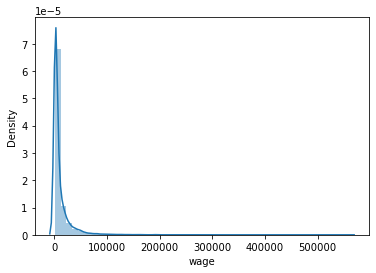

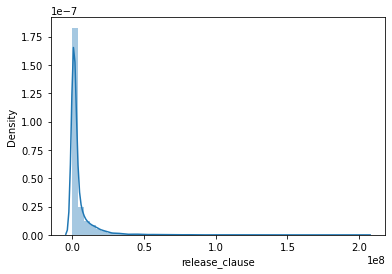

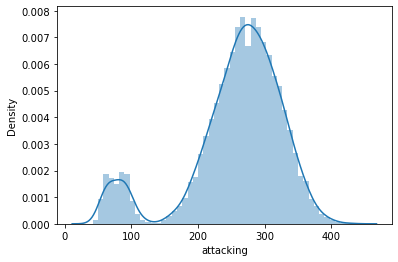

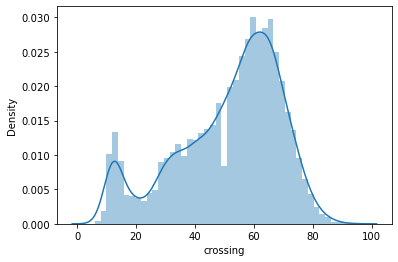

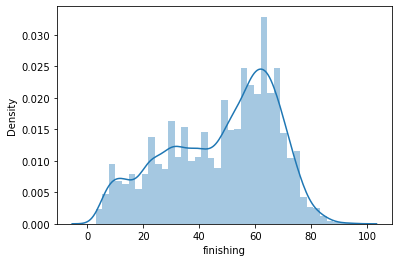

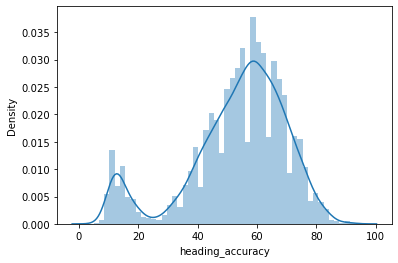

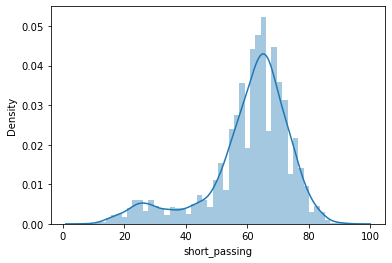

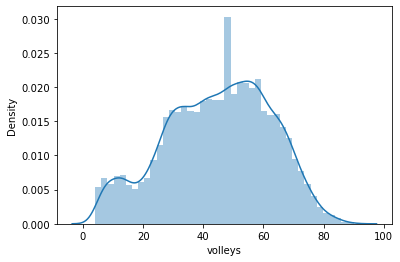

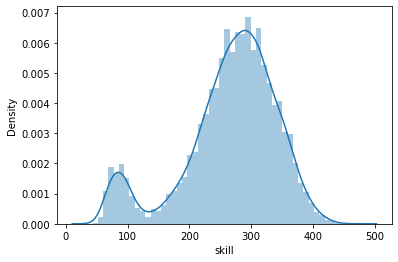

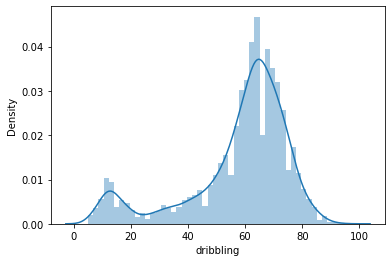

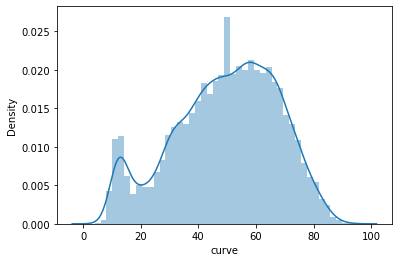

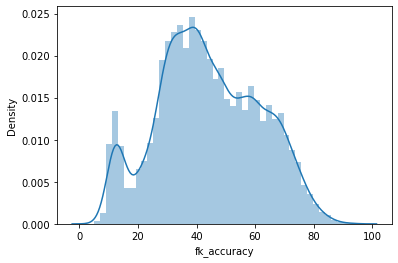

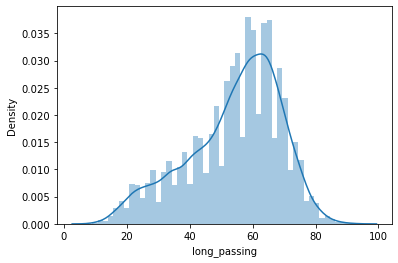

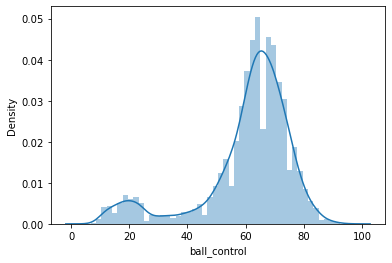

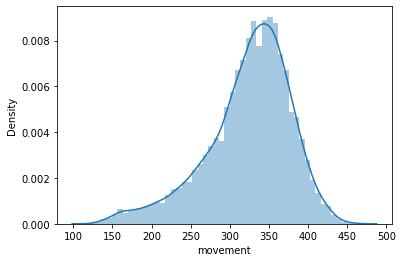

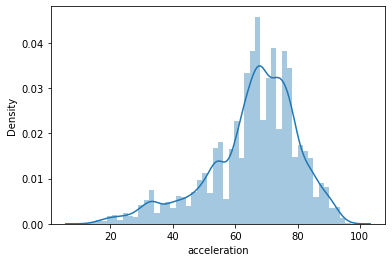

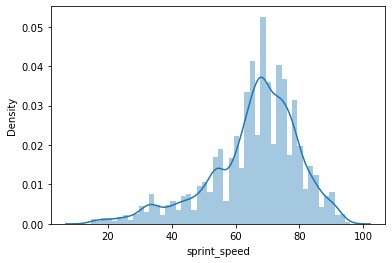

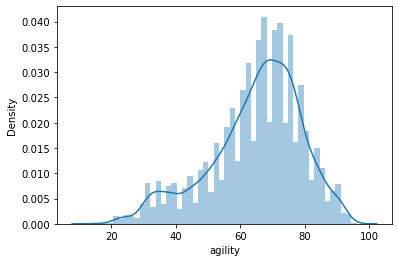

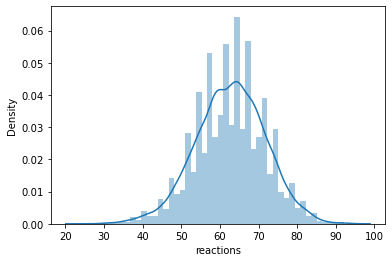

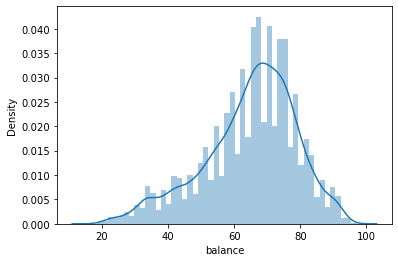

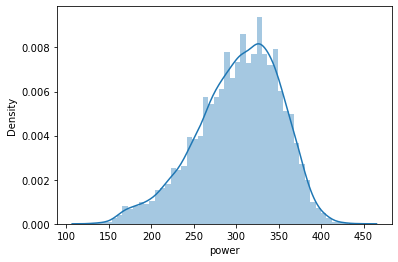

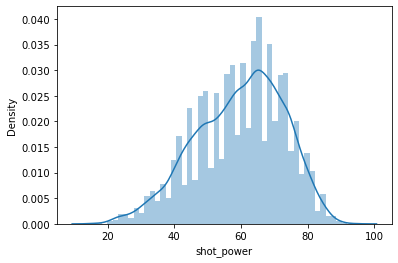

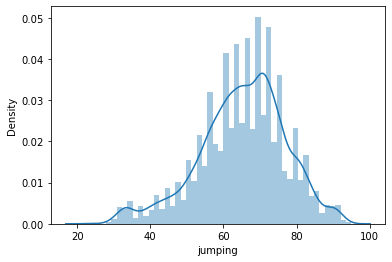

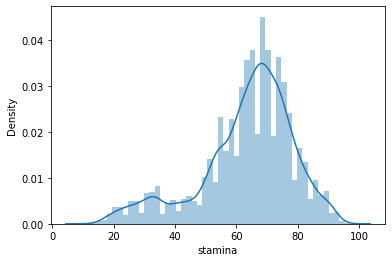

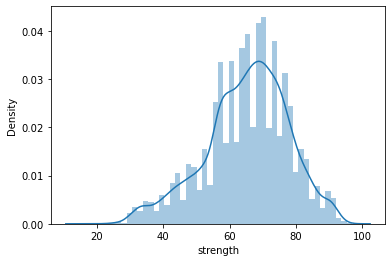

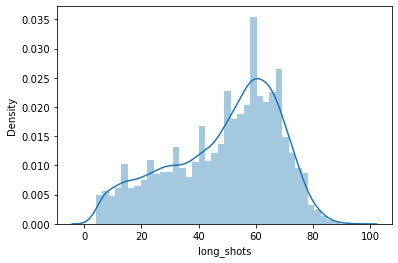

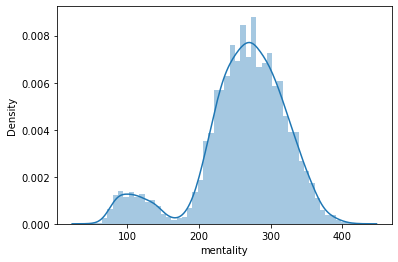

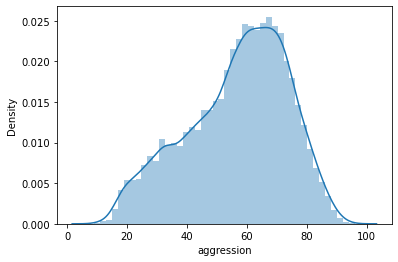

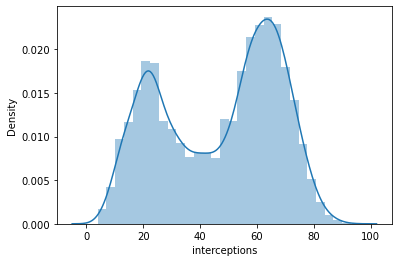

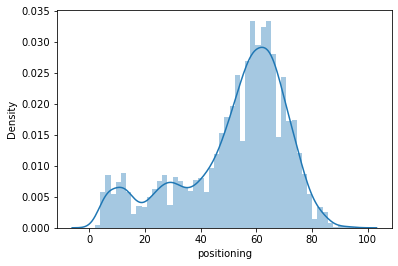

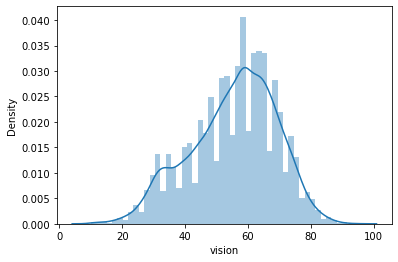

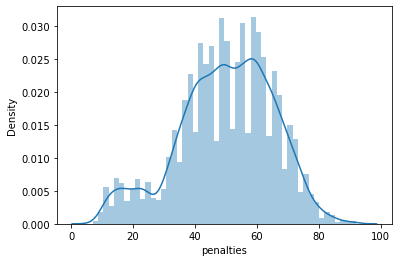

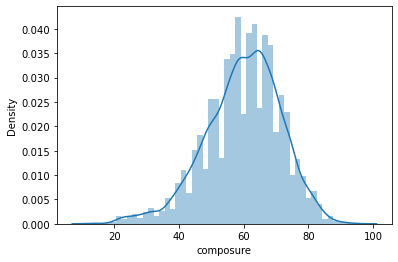

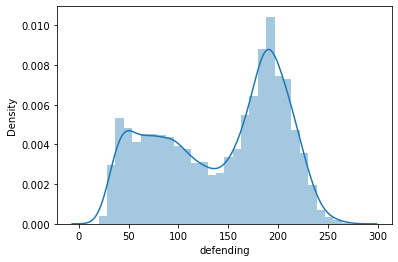

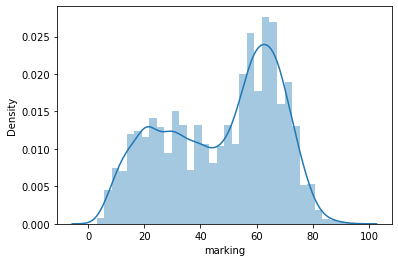

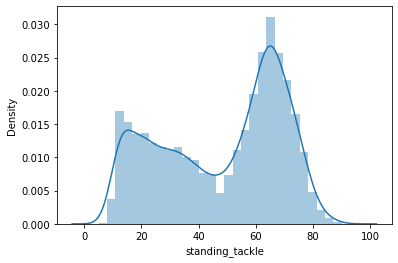

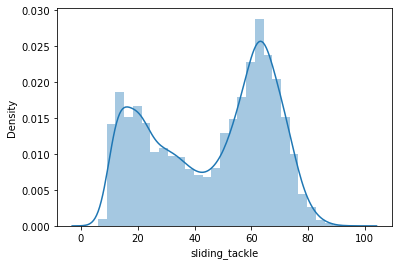

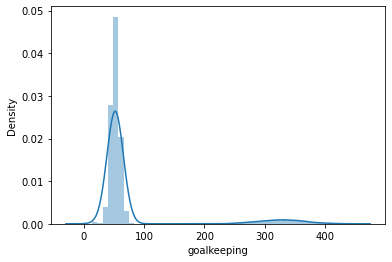

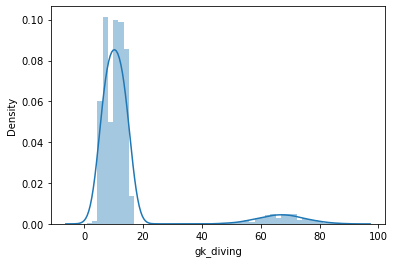

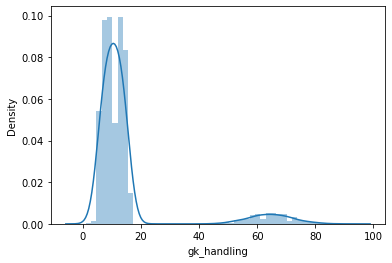

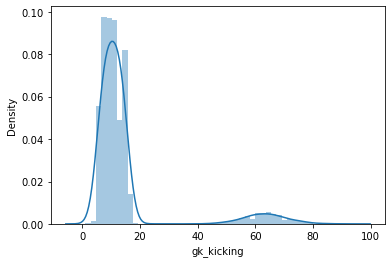

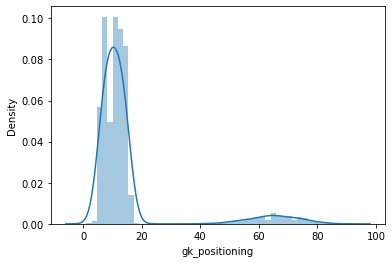

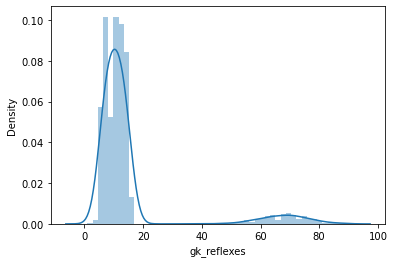

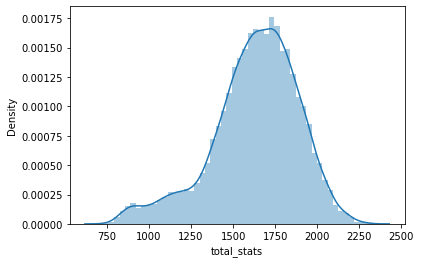

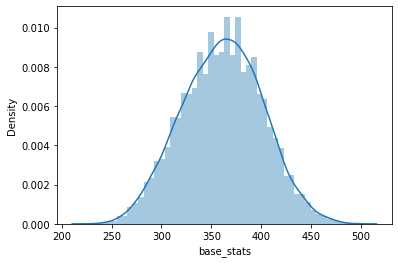

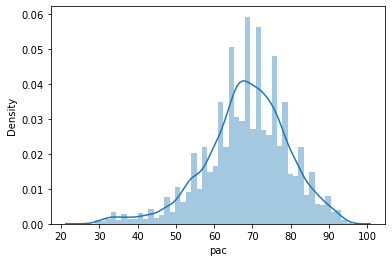

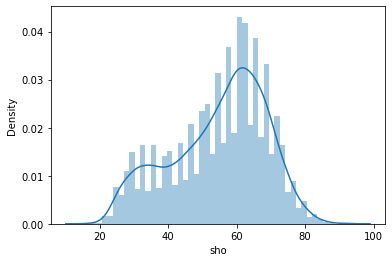

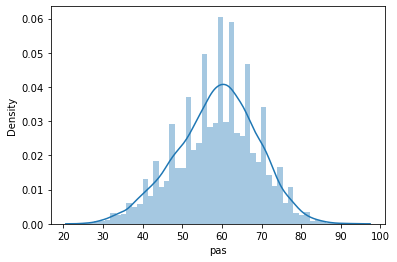

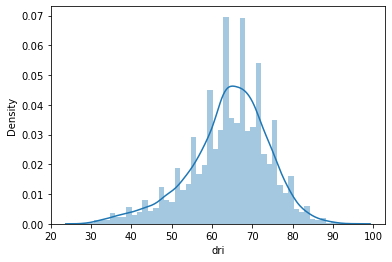

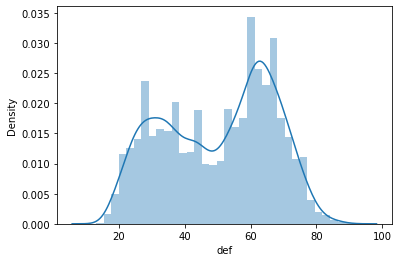

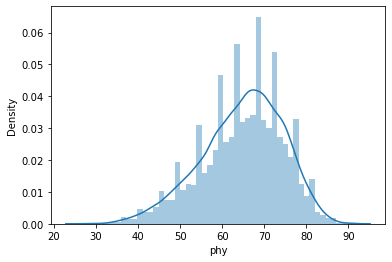

In [22]:
#visualization of data just to get a better ideia of whats in all the data
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

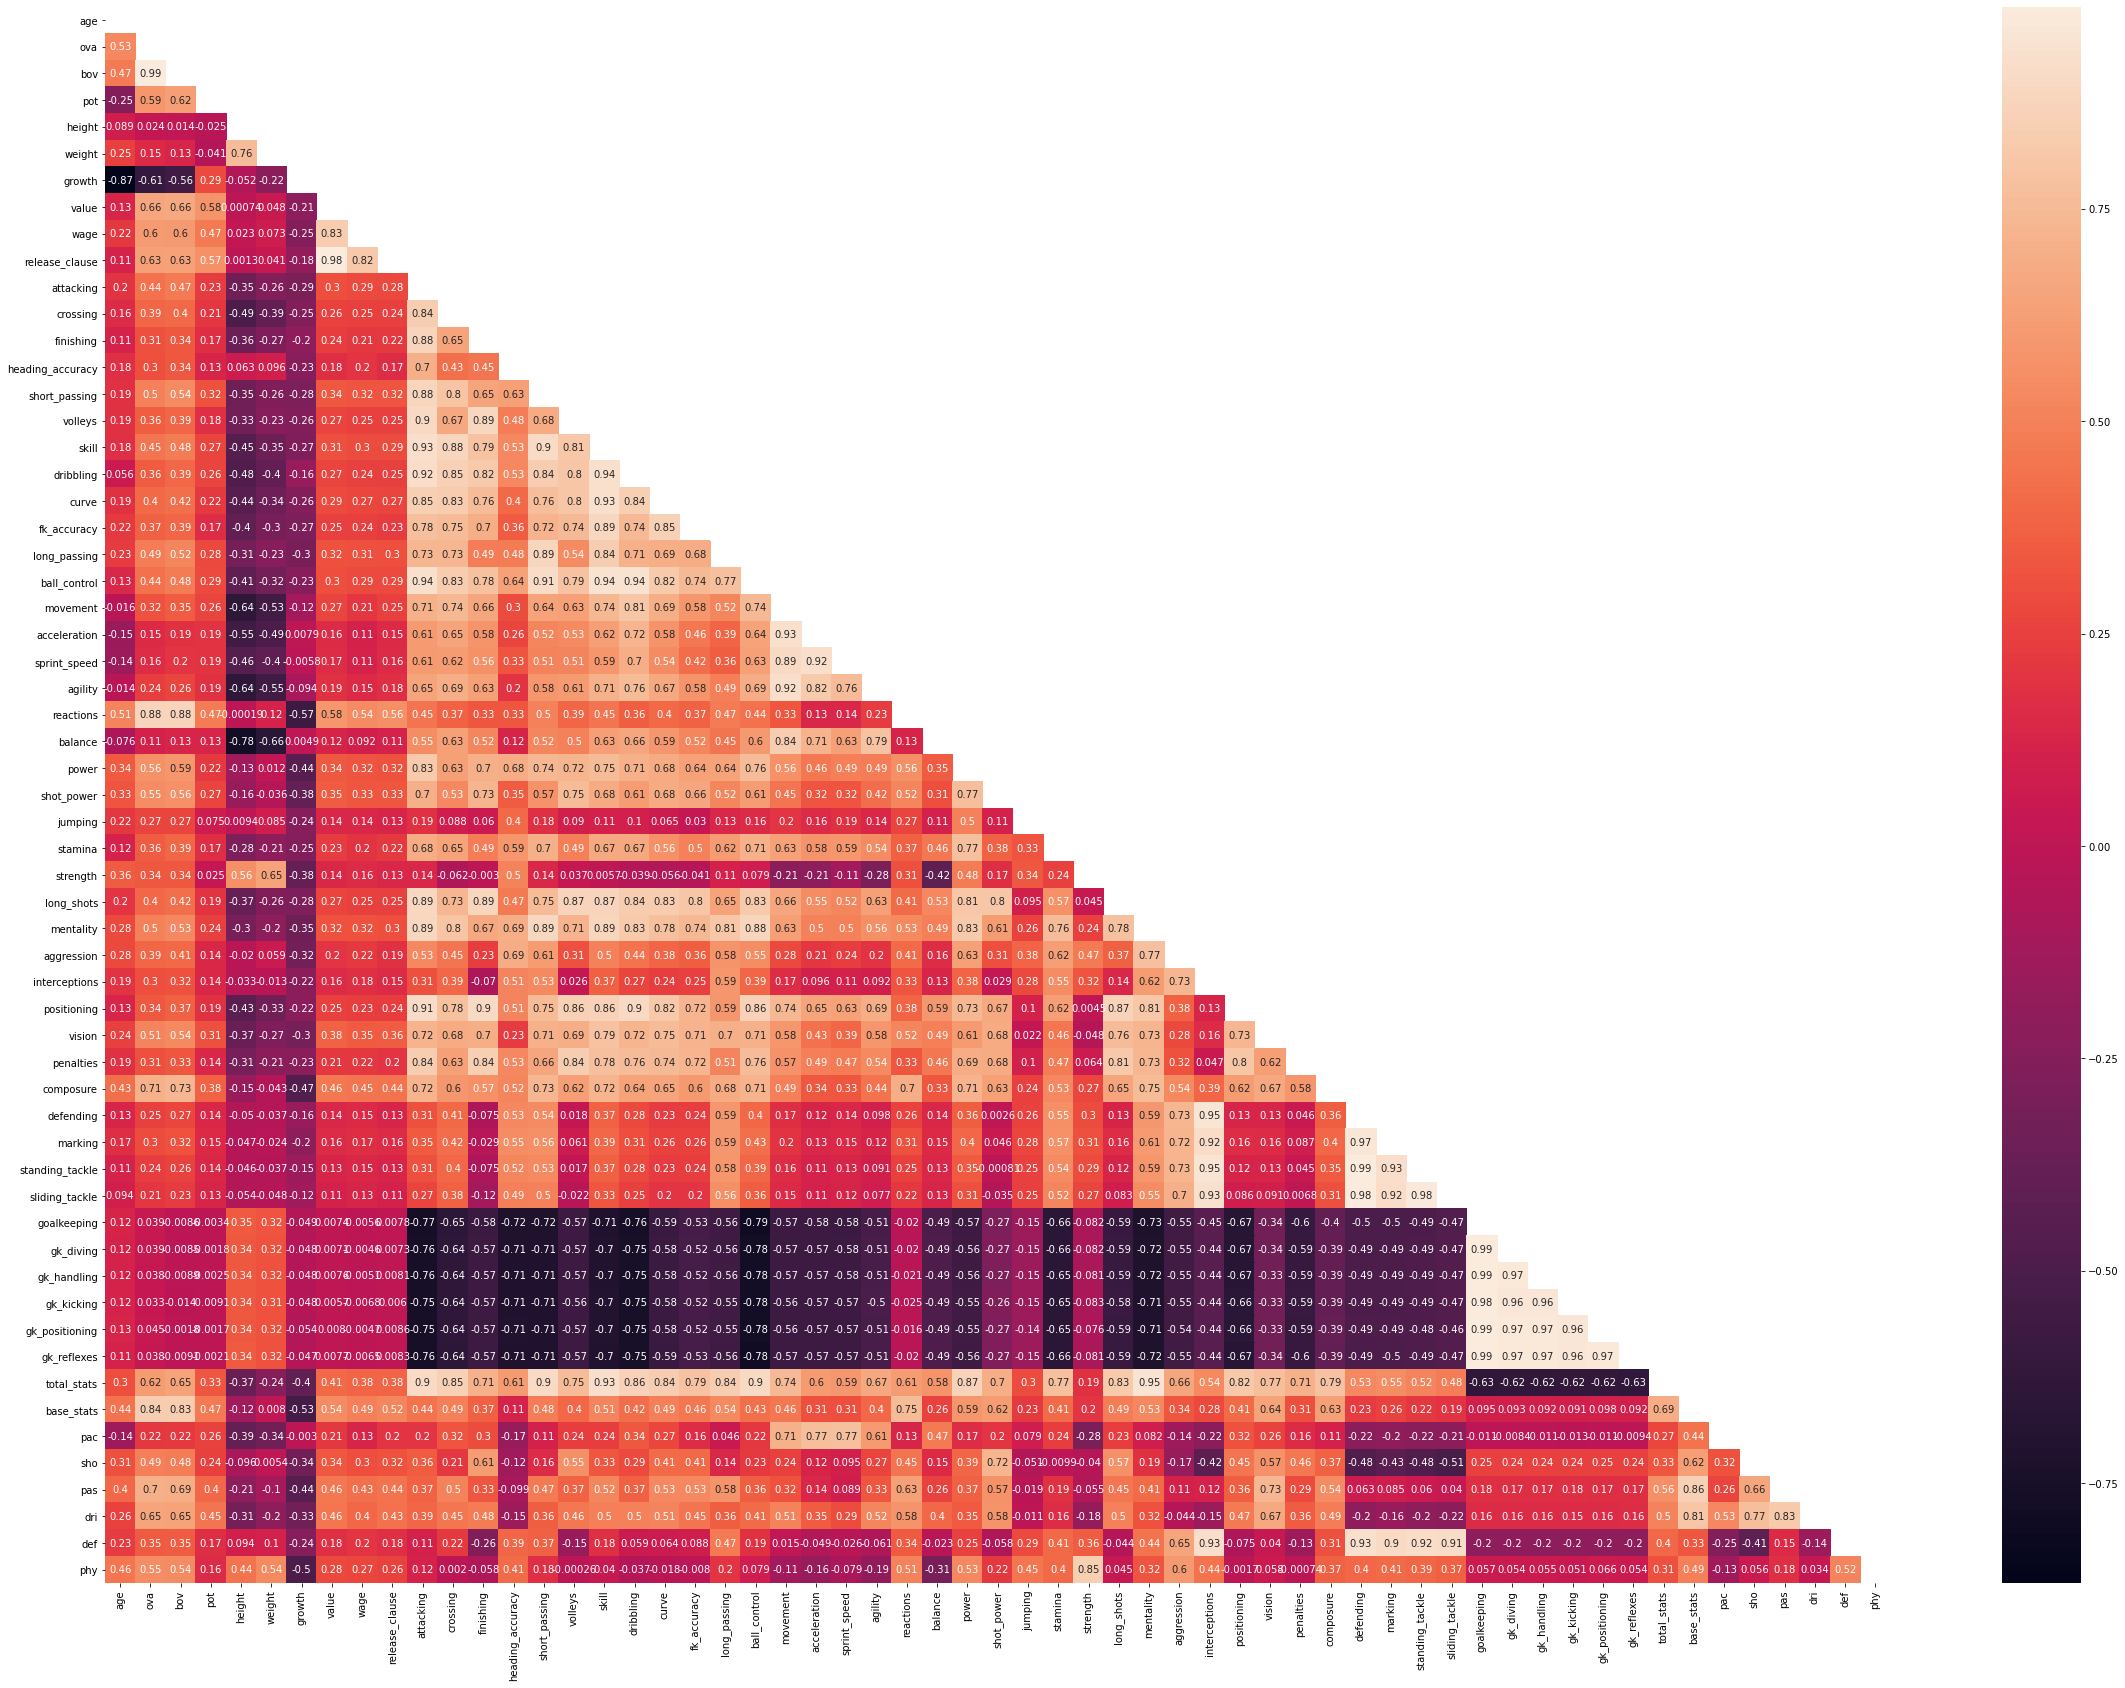

In [23]:
#checking correlations
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(40, 29))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

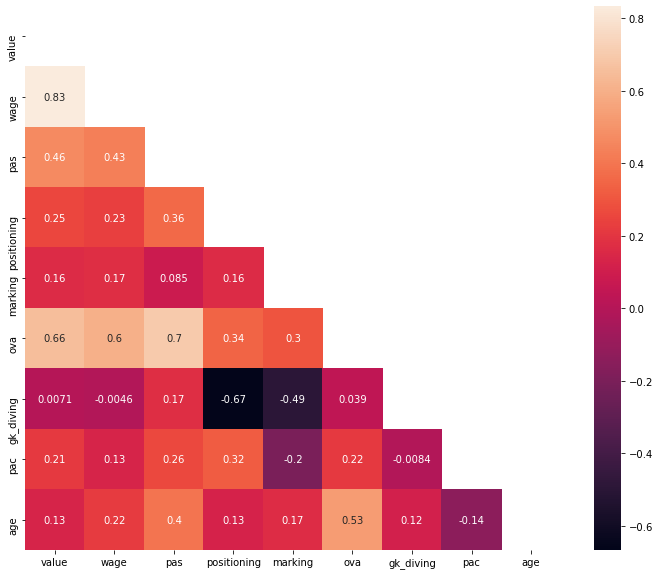

In [24]:
#I decided to try the 1st model with this 8 columns since they have a low correlation with eachother as to not have almost 
#the same column multiple times and having close to no influence on the end result

#I will try to predict the value of the players having there paremeters from the wide range i had available
datatest0 = data[['value','wage','pas','positioning','marking','ova','gk_diving','pac','age']]

mask = np.zeros_like(datatest0.corr())

mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(datatest0.corr(), mask=mask, annot=True)
plt.show()

In [25]:
def boxcox_transform(datatest0):
    numeric_cols = datatest0.select_dtypes(np.number).columns #separate into numeric columns
    _ci = {column: None for column in numeric_cols} #it will generate this dictionary
    for column in numeric_cols:
        datatest0[column] = np.where(datatest0[column]<=0, np.NAN, datatest0[column]) 
        datatest0[column] = datatest0[column].fillna(datatest0[column].mean())
        transformed_data, ci = stats.boxcox(datatest0[column])
        datatest0[column] = transformed_data
        _ci[column] = [ci] 
    return datatest0, _ci

In [26]:
#aplying the boxcox transform
datatest0, _ci = boxcox_transform(datatest0)
datatest0

,value,wage,pas,positioning,marking,ova,gk_diving,pac,age
1,7.844855,5.777062,312.827864,559.682876,91.423308,48.783534,1.065127,1145.457693,2.348542
4,8.470223,5.984967,388.565528,635.622096,88.566050,54.993035,0.976327,1364.629032,2.337718
6,8.292387,6.440555,375.608680,475.688681,84.293485,52.519980,1.013360,797.986876,2.359004
12,8.470223,5.915947,325.110314,728.653499,33.271733,54.376057,1.099893,1858.496439,2.326508
26,8.226262,6.417349,318.951590,31.939381,13.959751,55.609175,1.262350,2365.810322,2.397633
...,...,...,...,...,...,...,...,...,...
17120,7.817723,5.246137,118.614793,90.878697,78.622657,44.379925,1.099893,1187.804308,2.129512
17121,7.336377,5.425633,219.854110,364.707869,41.283791,39.281388,1.113389,1553.318055,2.036785
17122,7.336377,5.246137,151.944580,303.483246,70.175651,39.281388,1.042099,1602.338596,2.036785
17123,7.771537,5.425633,225.375567,274.454589,72.983093,43.112224,1.144167,2021.011659,2.086069


In [27]:
#function to remove outliers of most of the data
def remove_outliers(datatest0, threshold=1.5, in_columns=datatest0.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(datatest0[column],75)
            lower = np.percentile(datatest0[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            datatest0 = datatest0[(datatest0[column]>lower_limit) & (datatest0[column]<upper_limit)]
    return datatest0

In [28]:
#apply function
# i will not be capping the outliers too hardcore because all i want to eliminate are just the outliers with the highest values
#that i belive will compromise the individual result of the middle to low tier of players
datatest1 = datatest0.copy()

datatest1 = remove_outliers(datatest1, threshold=2) #maybe skip the most important ones

datatest1

,value,wage,pas,positioning,marking,ova,gk_diving,pac,age
1,7.844855,5.777062,312.827864,559.682876,91.423308,48.783534,1.065127,1145.457693,2.348542
4,8.470223,5.984967,388.565528,635.622096,88.566050,54.993035,0.976327,1364.629032,2.337718
6,8.292387,6.440555,375.608680,475.688681,84.293485,52.519980,1.013360,797.986876,2.359004
12,8.470223,5.915947,325.110314,728.653499,33.271733,54.376057,1.099893,1858.496439,2.326508
26,8.226262,6.417349,318.951590,31.939381,13.959751,55.609175,1.262350,2365.810322,2.397633
...,...,...,...,...,...,...,...,...,...
17120,7.817723,5.246137,118.614793,90.878697,78.622657,44.379925,1.099893,1187.804308,2.129512
17121,7.336377,5.425633,219.854110,364.707869,41.283791,39.281388,1.113389,1553.318055,2.036785
17122,7.336377,5.246137,151.944580,303.483246,70.175651,39.281388,1.042099,1602.338596,2.036785
17123,7.771537,5.425633,225.375567,274.454589,72.983093,43.112224,1.144167,2021.011659,2.086069


In [29]:
#filtering the outliers on the more important columns
datatest2 = remove_outliers(datatest1, threshold=1.5, in_columns=['value', 'wage'])

datatest2

,value,wage,pas,positioning,marking,ova,gk_diving,pac,age
1,7.844855,5.777062,312.827864,559.682876,91.423308,48.783534,1.065127,1145.457693,2.348542
4,8.470223,5.984967,388.565528,635.622096,88.566050,54.993035,0.976327,1364.629032,2.337718
6,8.292387,6.440555,375.608680,475.688681,84.293485,52.519980,1.013360,797.986876,2.359004
12,8.470223,5.915947,325.110314,728.653499,33.271733,54.376057,1.099893,1858.496439,2.326508
26,8.226262,6.417349,318.951590,31.939381,13.959751,55.609175,1.262350,2365.810322,2.397633
...,...,...,...,...,...,...,...,...,...
17120,7.817723,5.246137,118.614793,90.878697,78.622657,44.379925,1.099893,1187.804308,2.129512
17121,7.336377,5.425633,219.854110,364.707869,41.283791,39.281388,1.113389,1553.318055,2.036785
17122,7.336377,5.246137,151.944580,303.483246,70.175651,39.281388,1.042099,1602.338596,2.036785
17123,7.771537,5.425633,225.375567,274.454589,72.983093,43.112224,1.144167,2021.011659,2.086069


In [30]:
# encoding categorical-- not sure i have to do this one since i did not pick any categorical data
datatest0 = pd.get_dummies(datatest2, drop_first=True)
datatest0

,value,wage,pas,positioning,marking,ova,gk_diving,pac,age
1,7.844855,5.777062,312.827864,559.682876,91.423308,48.783534,1.065127,1145.457693,2.348542
4,8.470223,5.984967,388.565528,635.622096,88.566050,54.993035,0.976327,1364.629032,2.337718
6,8.292387,6.440555,375.608680,475.688681,84.293485,52.519980,1.013360,797.986876,2.359004
12,8.470223,5.915947,325.110314,728.653499,33.271733,54.376057,1.099893,1858.496439,2.326508
26,8.226262,6.417349,318.951590,31.939381,13.959751,55.609175,1.262350,2365.810322,2.397633
...,...,...,...,...,...,...,...,...,...
17120,7.817723,5.246137,118.614793,90.878697,78.622657,44.379925,1.099893,1187.804308,2.129512
17121,7.336377,5.425633,219.854110,364.707869,41.283791,39.281388,1.113389,1553.318055,2.036785
17122,7.336377,5.246137,151.944580,303.483246,70.175651,39.281388,1.042099,1602.338596,2.036785
17123,7.771537,5.425633,225.375567,274.454589,72.983093,43.112224,1.144167,2021.011659,2.086069


In [31]:
# DIVISION

In [32]:
# splitting our data

X = datatest0.drop('value', axis=1)
y = datatest0['value']

# using different columns to train and test to get more accurate results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
predictions = model.predict(X_test)

In [35]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9673350596481952, 0.050579895790058456, 0.07130200343833508)

In [36]:
# MAE and MSE are log transformed
# have to inverse transform the test and the predictions
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])
the_ytest = inv_boxcox(y_test,_ci['value'])

In [37]:
#the differente in mistakes
mean_absolute_error(the_ytest, predictions), mean_squared_error(the_ytest, predictions, squared=False)

(1203792.1429370146, 9668345.9047435)

In [38]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
17114,100000.0,9.355226e+04,6.447735e+03
12240,300000.0,2.843543e+05,1.564574e+04
426,3100000.0,3.028325e+06,7.167498e+04
2387,8000000.0,6.270927e+06,1.729073e+06
8449,9000000.0,9.678511e+06,6.785114e+05
...,...,...,...
15846,650000.0,7.160353e+05,6.603530e+04
5908,9000000.0,8.408275e+06,5.917252e+05
15739,120000.0,1.181797e+05,1.820320e+03
6657,3600000.0,3.090926e+06,5.090743e+05


In [39]:
results.sort_values('resid', ascending=False)

,true,pred,resid
9633,69500000.0,4.487603e+08,3.792603e+08
4049,72500000.0,3.338858e+08,2.613858e+08
3961,71000000.0,2.707467e+08,1.997467e+08
11287,45000000.0,2.226530e+08,1.776530e+08
6605,60000000.0,2.105805e+08,1.505805e+08
...,...,...,...
16051,160000.0,1.601425e+05,1.424896e+02
16559,170000.0,1.698774e+05,1.225595e+02
12747,350000.0,3.499676e+05,3.235560e+01
14801,110000.0,1.100174e+05,1.737920e+01


In [40]:
results[results['true'] >= 40]

,true,pred,resid
17114,100000.0,9.355226e+04,6.447735e+03
12240,300000.0,2.843543e+05,1.564574e+04
426,3100000.0,3.028325e+06,7.167498e+04
2387,8000000.0,6.270927e+06,1.729073e+06
8449,9000000.0,9.678511e+06,6.785114e+05
...,...,...,...
15846,650000.0,7.160353e+05,6.603530e+04
5908,9000000.0,8.408275e+06,5.917252e+05
15739,120000.0,1.181797e+05,1.820320e+03
6657,3600000.0,3.090926e+06,5.090743e+05


In [41]:
results.describe()

,true,pred,resid
count,4.797000e+03,4.797000e+03,4.797000e+03
mean,2.686019e+06,3.413336e+06,1.203792e+06
std,5.296425e+06,1.374859e+07,9.594112e+06
min,4.500000e+04,3.206561e+04,3.989725e+00
25%,4.000000e+05,4.072589e+05,2.858131e+04
50%,8.500000e+05,8.886075e+05,9.264083e+04
75%,2.600000e+06,2.241379e+06,4.734812e+05
max,7.250000e+07,4.487603e+08,3.792603e+08


<AxesSubplot:xlabel='true', ylabel='pred'>

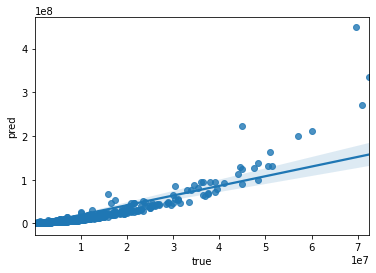

In [42]:
sns.regplot(results['true'], results['pred'])

#Conclusions

   From this last plot i was able to conclude that only a couple of outliers were quite out of the prediction and it probably caused the line to be slightly above the perfect intercepting line in the graph but could be acomplished with further improvements.